In [1]:
import csv
import time
import pandas as pd
import string

from nltk.corpus import stopwords

import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

import re
from collections import Counter
from string import punctuation

from wordcloud import WordCloud 

from textblob import TextBlob

## Analysis of Reddit Posts

In [47]:
col_names=["index","keyword",'Post','Score','Comments','link','domain','url','postid','subreddit','Date']

df = pd.read_csv('newdata.csv', names=col_names)

df.head()
#df.count()

,index,keyword,Post,Score,Comments,link,domain,url,postid,subreddit,Date
0,1,modi,[R] Megathread II: India-Pakistan Border Skirmish,394,5408,https://www.reddit.com/r/india/comments/avghfn...,self.india,/r/india/comments/avghfn/r_megathread_ii_india...,avghfn,india,02-27-2019
1,2,modi,Trump used accent to imitate India's prime min...,26074,3631,http://thehill.com/homenews/administration/370...,thehill.com,/r/worldnews/comments/7s6k5t/trump_used_accent...,7s6k5t,worldnews,01-22-2018
2,3,modi,Indian Prime Minister Narendra Modi told Germa...,58611,3242,http://in.reuters.com/article/us-germany-india...,in.reuters.com,/r/worldnews/comments/6efgnz/indian_prime_mini...,6efgnz,worldnews,05-31-2017
3,4,modi,[R] Megathread III: India-Pakistan Border Skir...,218,2734,https://www.reddit.com/r/india/comments/aw38i5...,self.india,/r/india/comments/aw38i5/r_megathread_iii_indi...,aw38i5,india,03-01-2019
4,5,modi,Modi: From Nov 8 to abolish 500 and 1000 Rupee...,2917,1744,https://www.reddit.com/r/india/comments/5btlxy...,self.india,/r/india/comments/5btlxy/modi_from_nov_8_to_ab...,5btlxy,india,11-08-2016


In [48]:
df = df.drop_duplicates('postid')
df.shape

(2114, 11)

In [49]:
df = df.filter(['Post','Score','Comments','Date'], axis=1)
df.head()

,Post,Score,Comments,Date
0,[R] Megathread II: India-Pakistan Border Skirmish,394,5408,02-27-2019
1,Trump used accent to imitate India's prime min...,26074,3631,01-22-2018
2,Indian Prime Minister Narendra Modi told Germa...,58611,3242,05-31-2017
3,[R] Megathread III: India-Pakistan Border Skir...,218,2734,03-01-2019
4,Modi: From Nov 8 to abolish 500 and 1000 Rupee...,2917,1744,11-08-2016


In [50]:
#extract the tweet with more FAVs and more RTs:

fav_max = np.max(df['Score'])
rt_max = np.max(df['Comments'])

fav = df[df.Score == fav_max].index[0]
rt = df[df.Comments == rt_max].index[0]

# Max FAVs:
print("\nThe comment with more likes is: \n{}".format(df['Post'][fav]))
print("Number of likes: {}".format(fav_max))
#print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("\nThe comment with more retweets is: \n{}".format(df['Post'][rt]))
print("Number of retweets: {}".format(rt_max))
#print("{} characters.\n".format(data['len'][rt]))


The tweet with more likes is: 
Indian Prime Minister Narendra Modi told German Chancellor Angela Merkel in talks in Berlin on Tuesday that India would stay in the Paris climate accord even if the United States pulled out
Number of likes: 58611

The tweet with more retweets is: 
[R] Megathread II: India-Pakistan Border Skirmish
Number of retweets: 5408


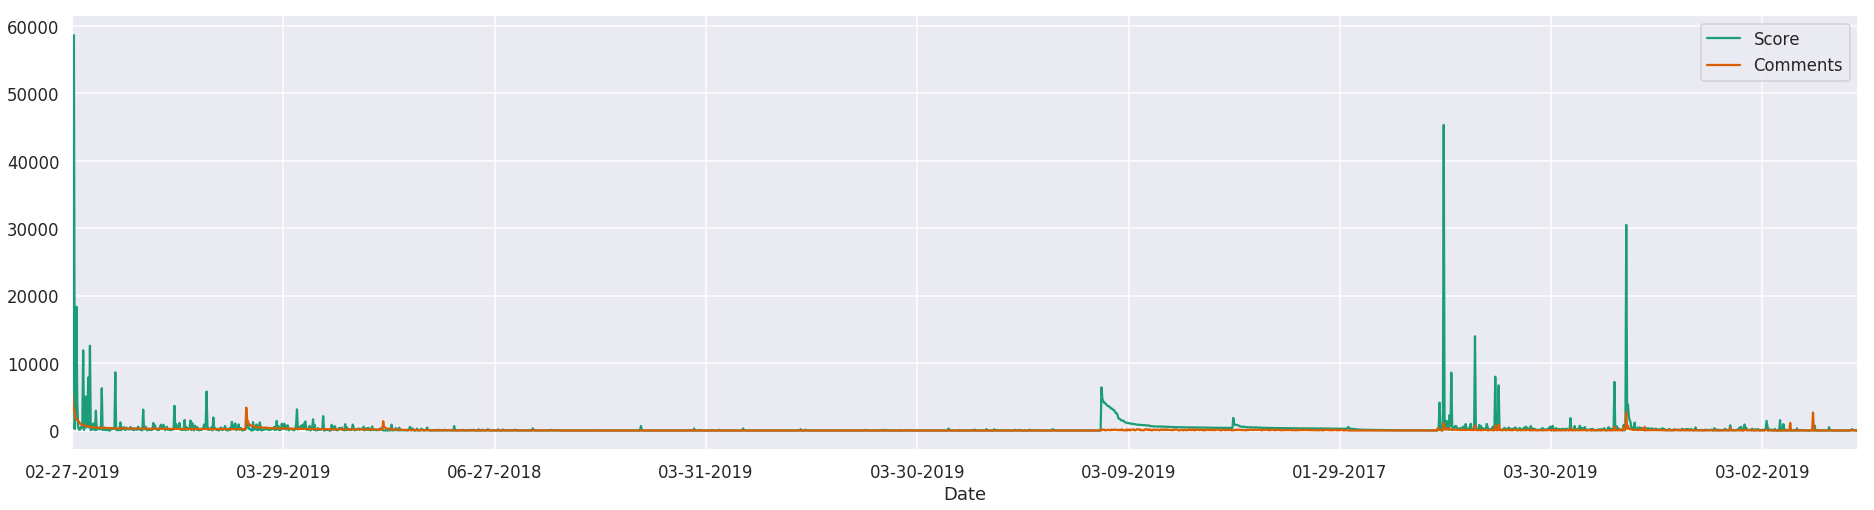

In [51]:
# Create time series for the data:

#tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=df['Score'].values, index=df['Date'])
tret = pd.Series(data=df['Comments'].values, index=df['Date'])

# Likes vs retweets visualization:
tfav.plot(figsize=(32,8), label="Score", legend=True)
tret.plot(figsize=(32,8), label="Comments", legend=True)

In [52]:
df['Score'].corr(df['Comments'])

0.48313614932545496

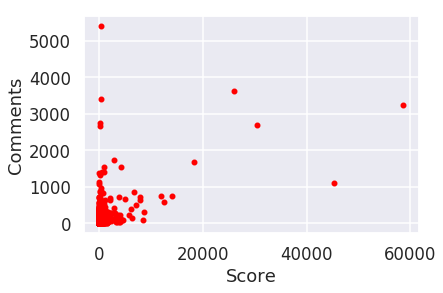

In [53]:
df.plot.scatter(x='Score',y='Comments',c='r')

## Analysis of Reddit Comments

In [2]:
col_names=["Sub ID","Comment ID",'Comment','score','sticked','subreddit','Date']

df = pd.read_csv('comment.csv', names=col_names)

df.head()
#df.count()

,Sub ID,Comment ID,Comment,score,sticked,subreddit,Date
0,t1_ek0e6e2,ek13g3y,About Modi marring gand?,1,False,india,04-03-2019
1,t1_ek11nk7,ek12juv,Rana Ayyub published Gujarat Files: Anatomy of...,1,False,india,04-03-2019
2,t3_b8zev0,ek12hf5,It's like Modi's 56 inches. Schwarzenegger use...,1,False,india,04-03-2019
3,t1_ek0ik5x,ek12gzf,vikas cong and vikas are parallel terms \nthey...,1,False,india,04-03-2019
4,t3_b8y6xk,ek11o9c,"""The money (for NYAY scheme) will come from th...",1,False,india,04-03-2019


In [3]:
df.shape

(91432, 7)

In [4]:
df = df.drop_duplicates('Comment')
df.shape

(81724, 7)

In [5]:
# Sort dataframe by date column
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date',ascending=True)
df = df.reset_index().drop('index',axis=1)
df.head()

,Sub ID,Comment ID,Comment,score,sticked,subreddit,Date
0,t3_71exwp,dnaoe8p,Well.. we have to also consider Modi multibit ...,3,False,headphones,2017-09-21
1,t1_dnb61yr,dnb7n0i,Do you need coaxial and optical inputs? That's...,1,False,headphones,2017-09-21
2,t3_71ju99,dnb82u5,"^This ^article ^is ^adblocker ^unfriendly, ^fo...",1,False,india,2017-09-21
3,t3_71ielb,dnb8gg7,So I've had a schiit stack magni/modi 2u for a...,1,False,headphones,2017-09-21
4,t1_dnb4try,dnb8s7a,Why would it be weakness? It is a traditional ...,1,False,india,2017-09-21


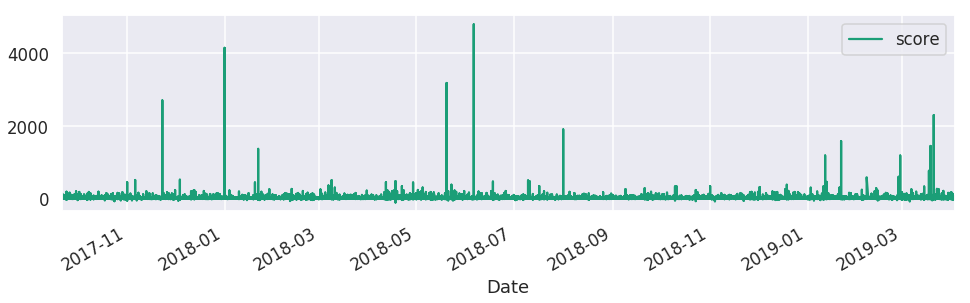

In [6]:
# Create time series for the data:

#tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=df['score'].values, index=df['Date'])
#tret = pd.Series(data=df['retweets'].values, index=df['date'])

# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="score", legend=True)
#tret.plot(figsize=(32,8), label="Retweets", legend=True)

In [7]:
#extract the tweet with more FAVs and more RTs:

fav_max = np.max(df['score'])
#rt_max = np.max(df['retweets'])

fav = df[df.score == fav_max].index[0]
#rt = df[df.retweets == rt_max].index[0]

# Max FAVs:
print("\nThe comment with more score is: \n{}".format(df['Comment'][fav]))
print("Number of likes: {}".format(fav_max))
#print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
#print("\nThe tweet with more retweets is: \n{}".format(df['text'][rt]))
#print("Number of retweets: {}".format(rt_max))
#print("{} characters.\n".format(data['len'][rt]))


The comment with more score is: 
This is literally a long standing meme on 4chan

I legit believe that either Trump or someone close to him lurks on 4chan

Just waiting for him to call up Narendra Modi and say "poo in loo"
Number of likes: 4800


In [8]:
df = df.filter(['Comment'], axis=1)
df.head()

,Comment
0,Well.. we have to also consider Modi multibit ...
1,Do you need coaxial and optical inputs? That's...
2,"^This ^article ^is ^adblocker ^unfriendly, ^fo..."
3,So I've had a schiit stack magni/modi 2u for a...
4,Why would it be weakness? It is a traditional ...


## Data Cleaning

In [9]:
# helper function to clean text
def processText(Text):
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', str(text))
    #Convert @username to AT_USER
    text = re.sub('@[^\s]+','',text)
    # Remove tickers
    text = re.sub(r'\$\w*', '', text)
    # To lowercase
    text = text.lower()
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    # Remove hashtags
    text = re.sub(r'#\w*', '', text)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    text = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', text)
    # Remove words with 2 or fewer letters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    # Remove whitespace (including new line characters)
    text = re.sub(r'\s\s+', ' ', text)
    # Remove single space remaining at the front of the text.
    text = text.lstrip('') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    text = ''.join(c for c in text if c <= '\uffff') 
    return text
df['clean_comment'] = df['Comment'].apply(processText)
df.head()


,Comment,clean_comment
0,Well.. we have to also consider Modi multibit ...,well have also consider modi multibit was out ...
1,Do you need coaxial and optical inputs? That's...,you need coaxial and optical inputs that the ...
2,"^This ^article ^is ^adblocker ^unfriendly, ^fo...",this article adblocker unfriendly following t...
3,So I've had a schiit stack magni/modi 2u for a...,had schiit stack magni modi for while hooked ...
4,Why would it be weakness? It is a traditional ...,why would weakness traditional gandhi constitu...


## Sentiment Categorizing

In [10]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

    
df['category'] = df['clean_comment'].apply(analyze_sentiment)
df.head()

,Comment,clean_comment,category
0,Well.. we have to also consider Modi multibit ...,well have also consider modi multibit was out ...,1
1,Do you need coaxial and optical inputs? That's...,you need coaxial and optical inputs that the ...,0
2,"^This ^article ^is ^adblocker ^unfriendly, ^fo...",this article adblocker unfriendly following t...,1
3,So I've had a schiit stack magni/modi 2u for a...,had schiit stack magni modi for while hooked ...,1
4,Why would it be weakness? It is a traditional ...,why would weakness traditional gandhi constitu...,1


## Visualization of Sentiment

In [11]:
# check the number of positive vs. negative tagged sentences
positives = df['category'][df.category == 1]
negatives = df['category'][df.category == -1]
neutrals = df['category'][df.category == 0]


print('number of positve categorized text is:  {}'.format(len(positives)))
print('number of negative categorized text is: {}'.format(len(negatives)))
print('number of neutral categorized text is: {}'.format(len(neutrals)))
print('total length of the data is:            {}'.format(df.shape[0]))

number of positve categorized text is:  43252
number of negative categorized text is: 20007
number of neutral categorized text is: 18465
total length of the data is:            81724


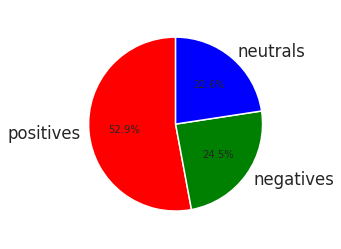

In [12]:
#import matplotlib.pyplot as plt

slices_len = [len(positives), len(negatives), len(neutrals)]
category = ['positives', 'negatives', 'neutrals']
colors = ['r', 'g', 'b']

plt.pie(slices_len, labels=category, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

## Data Visualization

In [13]:
# tokenize helper function
import string
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

def remove_words(word_list):
    remove = ['narendra','modi','...','“','”','’','…','modi’']
    return [w for w in word_list if w not in remove]
# -------------------------------------------
# tokenize message column and create a column for tokens
df = df.copy()
df['tokens'] = df['clean_comment'].apply(text_process) # tokenize style 1
df['no_modi'] = df['tokens'].apply(remove_words) #tokenize style 2
df = df.drop(['tokens'],axis=1)
df.head()

,Comment,clean_comment,category,no_modi
0,Well.. we have to also consider Modi multibit ...,well have also consider modi multibit was out ...,1,"[well, also, consider, multibit, long, time, r..."
1,Do you need coaxial and optical inputs? That's...,you need coaxial and optical inputs that the ...,0,"[need, coaxial, optical, inputs, reason, get, ..."
2,"^This ^article ^is ^adblocker ^unfriendly, ^fo...",this article adblocker unfriendly following t...,1,"[article, adblocker, unfriendly, following, te..."
3,So I've had a schiit stack magni/modi 2u for a...,had schiit stack magni modi for while hooked ...,1,"[schiit, stack, magni, hooked, recently, purch..."
4,Why would it be weakness? It is a traditional ...,why would weakness traditional gandhi constitu...,1,"[would, weakness, traditional, gandhi, constit..."


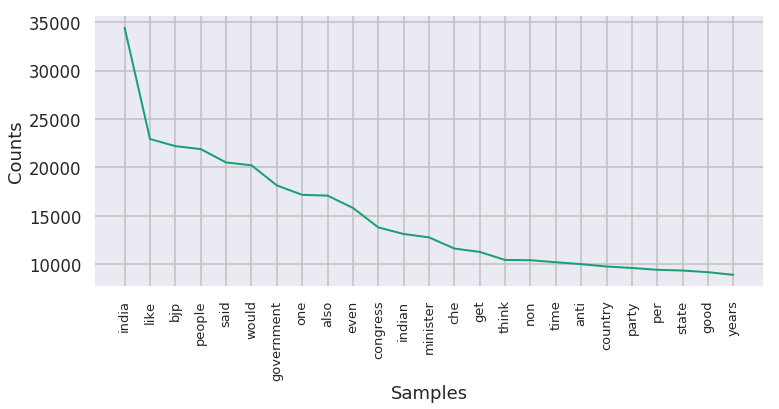

Text(0.5, 0, 'Word Rank')

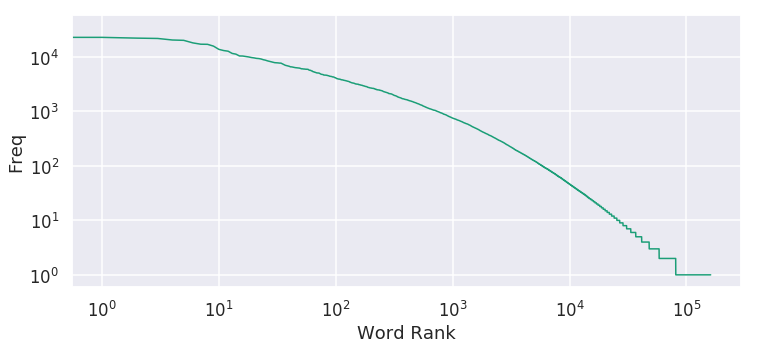

In [20]:
# plot word frequency distribution of first few words without narendra, modi
# no_modi
no_modi = []
for ls in df['no_modi']:
    words = [w for w in ls]
    for word in words:
        no_modi.append(word)
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(no_modi)
fd.plot(25,cumulative=False)

# log-log  of all words -- no_modi 
word_counts = sorted(Counter(no_modi).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

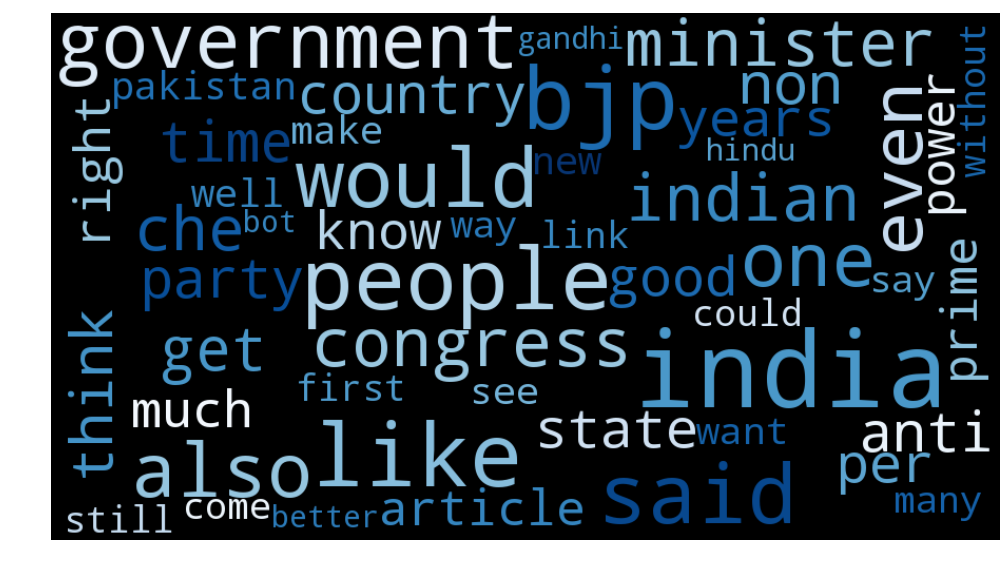

In [21]:
# split sentences to get individual words
all_words = []

for line in df['no_modi']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Cleaned data

In [22]:
dataset = df.filter(['clean_comment','category'], axis=1)
dataset.head()

,clean_comment,category
0,well have also consider modi multibit was out ...,1
1,you need coaxial and optical inputs that the ...,0
2,this article adblocker unfriendly following t...,1
3,had schiit stack magni modi for while hooked ...,1
4,why would weakness traditional gandhi constitu...,1


In [23]:
dataset.to_csv('redt_dataset.csv', index = False, sep=",", encoding="utf-8")